# Pandas

Pandas est une extension orientée data utilisant NumPy pour ses données.

Pandas est permet la gestion et l'analyse de données.

In [1]:
import numpy as np

In [2]:
import pandas as pd
print(f"pandas version {pd.__version__}")

pandas version 1.4.1


## La gestion des fichiers de données

In [3]:
dataset_name = 'titanic' # one the dataset available in seaborn cf sns.get_dataset_names()
try:
    data = pd.read_csv(f"https://raw.githubusercontent.com/mwaskom/seaborn-data/master/{dataset_name}.csv") # and save it if ok
    data.to_csv('./inputs/' + dataset_name + '.csv')
    print(f"Load dataset '{dataset_name}' from Internet")
except Exception as e:
    print("Unexpected error", type(e), e)
    print("Use fallback method")
    data = pd.read_csv('./inputs/' + dataset_name + '.csv')
    print(f"Load dataset '{dataset_name}' from local file")


Load dataset 'titanic' from Internet


Pandas supporte de nombreux formats en lecture et écriture: http://pandas-docs.github.io/pandas-docs-travis/user_guide/io.html

## Description des données

Souvent la première action est d'avoir une idée des données

In [4]:
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

Pour *décoder* le nommage des colonnes: https://data.world/nrippner/titanic-disaster-dataset

In [5]:
data.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [6]:
data.groupby('sex').describe()

survived                                              pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

        ... parch        fare                                               \
        ...   75%  max  count       mean        std   min        25%   50%   
sex     ...                                                                  
female  ...   1.0  6.0  314.0  44.479818  57.997698  6.75  12.071875  23.0   
male    ...   0.0  5.0  577.0  25.523893  43.138263  0.00   7.895800  10.5   

                         
          75%       max  
sex                      
female  55.00  512.3292  
male    26.55  512.3292  

[2 rows x 48 columns]

In [7]:
data.groupby('class').mean()

survived  pclass        age     sibsp     parch       fare  \
class                                                                
First   0.629630     1.0  38.233441  0.416667  0.356481  84.154687   
Second  0.472826     2.0  29.877630  0.402174  0.380435  20.662183   
Third   0.242363     3.0  25.140620  0.615071  0.393075  13.675550   

        adult_male     alone  
class                         
First     0.550926  0.504630  
Second    0.538043  0.565217  
Third     0.649695  0.659878

In [8]:
# .groupby() est d'intérêt assez limité sur les données non catégorielles
data.groupby('age').describe()

survived                                    pclass       ... parch       \
         count mean  std  min  25%  50%  75%  max  count mean  ...   75%  max   
age                                                            ...              
0.42       1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0    1.0  3.0  ...  1.00  1.0   
0.67       1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0    1.0  2.0  ...  1.00  1.0   
0.75       2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    2.0  3.0  ...  1.00  1.0   
0.83       2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    2.0  2.0  ...  1.75  2.0   
0.92       1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0    1.0  1.0  ...  2.00  2.0   
...        ...  ...  ...  ...  ...  ...  ...  ...    ...  ...  ...   ...  ...   
70.00      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2.0  1.5  ...  0.75  1.0   
70.50      1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0  3.0  ...  0.00  0.0   
71.00      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2.0  1.0  ...  0.00  0.0   
74.00      1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0  3.0  ...  0.00  0.0   
80.00      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0    1.0  1.0  ...  0.00  0.0   

       fare                                                               \
      count      mean        std       min       25%       50%       75%   
age                                                                        
0.42    1.0    8.5167        NaN    8.5167    8.5167    8.5167    8.5167   
0.67    1.0   14.5000        NaN   14.5000   14.5000   14.5000   14.5000   
0.75    2.0   19.2583   0.000000   19.2583   19.2583   19.2583   19.2583   
0.83    2.0   23.8750   7.247845   18.7500   21.3125   23.8750   26.4375   
0.92    1.0  151.5500        NaN  151.5500  151.5500  151.5500  151.5500   
...     ...       ...        ...       ...       ...       ...       ...   
70.00   2.0   40.7500  42.779960   10.5000   25.6250   40.7500   55.8750   
70.50   1.0    7.7500        NaN    7.7500    7.7500    7.7500    7.7500   
71.00   2.0   42.0792  10.500536   34.6542   38.3667   42.0792   45.7917   
74.00   1.0    7.7750        NaN    7.7750    7.7750    7.7750    7.7750   
80.00   1.0   30.0000        NaN   30.0000   30.0000   30.0000   30.0000   

                 
            max  
age              
0.42     8.5167  
0.67    14.5000  
0.75    19.2583  
0.83    29.0000  
0.92   151.5500  
...         ...  
70.00   71.0000  
70.50    7.7500  
71.00   49.5042  
74.00    7.7750  
80.00   30.0000  

[88 rows x 40 columns]

Nous sommes ici en présence d'un objet de type `DataFrame` de pandas

In [9]:
type(data)

pandas.core.frame.DataFrame

Un DataFrame est composé de **séries** de données (les colonnes) indexées par un **index** (les lignes)

In [10]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [11]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
data.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

On peut accéder indépendamment aux lignes et aux colonnes

In [13]:
s1=data['age'] # par série
print(type(s1))
print(s1)

<class 'pandas.core.series.Series'>
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [14]:
# On peut toujours revenir au tableau numpy sous-jacent
s1np = s1.to_numpy()
print(type(s1np))
print(s1np.dtype)

<class 'numpy.ndarray'>
float64


NB: si une conversion est requise pour permettre un type homogène, cela peut entrainer un surcoût non négligeable.

In [15]:
data.loc[22] # par index (ici numérique, mais cela pourrait être n'importe quoi)

survived                1
pclass                  3
sex                female
age                  15.0
sibsp                   0
parch                   0
fare               8.0292
embarked                Q
class               Third
who                 child
adult_male          False
deck                  NaN
embark_town    Queenstown
alive                 yes
alone                True
Name: 22, dtype: object

On peut parfois préférer .iloc qui porte toujours l'index numérique des lignes https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [16]:
data.iloc[22]

survived                1
pclass                  3
sex                female
age                  15.0
sibsp                   0
parch                   0
fare               8.0292
embarked                Q
class               Third
who                 child
adult_male          False
deck                  NaN
embark_town    Queenstown
alive                 yes
alone                True
Name: 22, dtype: object

In [17]:
data.loc[22, 'age'] # par index + série

15.0

Les précédentes méthodes de sélection par slices est encore possible

In [18]:
data.loc[:5, ('age', 'class')]

age  class
0  22.0  Third
1  38.0  First
2  26.0  Third
3  35.0  First
4  35.0  Third
5   NaN  Third

In [19]:
aged = data.loc[data.loc[:,'age']>=70, ('age','class','fare')]
aged

age   class     fare
96   71.0   First  34.6542
116  70.5   Third   7.7500
493  71.0   First  49.5042
630  80.0   First  30.0000
672  70.0  Second  10.5000
745  70.0   First  71.0000
851  74.0   Third   7.7750

NB: Notez que Pandas construit dynamiquement sur l'object DataFrame des attributs correspondant aux noms des séries.

In [20]:
aged['fare'].mean()

30.169057142857145

In [21]:
highest_price = aged['fare'].argmax()
print(f"highest price aged argmax={highest_price}")
data.loc[highest_price] # c'est complètement buggé => argmax c'est pour des iloc de la même structure
                        # il faut faire aged.iloc[highest_price]

highest price aged argmax=5


survived                0
pclass                  3
sex                  male
age                   NaN
sibsp                   0
parch                   0
fare               8.4583
embarked                Q
class               Third
who                   man
adult_male           True
deck                  NaN
embark_town    Queenstown
alive                  no
alone                True
Name: 5, dtype: object

In [22]:
highest_price = data['fare'].idxmax() # là, c'est OK idxmax avec loc
data.loc[highest_price]

survived               1
pclass                 1
sex               female
age                 35.0
sibsp                  0
parch                  0
fare            512.3292
embarked               C
class              First
who                woman
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                yes
alone               True
Name: 258, dtype: object

NB: il existe pleins de méthodes raffinant les requêtes:
* `isna()`, `notna()`...

## Construction de séries et de DataFrame à la main

Une série est composée de données (a priori homogène) et d'étiquettes (ce sont les index)

In [23]:
indexes = ['Superman','Wonder Woman','Aquaman','Iron Man','Catwoman', 'Sandman']

In [24]:
weights = pd.Series([146.,  61., 191., 203., 101.,  74.], index=indexes)

In [25]:
publishers = pd.Series(['DC Comics', 'DC Comics', 'Marvel Comics', 'Marvel Comics', 'DC Comics', 'DC Comics'], index=indexes)

In [26]:
genders = pd.Series(list("MFMMFM"), index=indexes)
 # list(string) : c'est une astuce commune pour transformer une string en une liste de lettres

In [27]:
hair_colors = pd.Series(['Blond', 'Black', 'Black', 'Brown', 'Black', 'Black'], index=indexes)

In [28]:
publishers

Superman            DC Comics
Wonder Woman        DC Comics
Aquaman         Marvel Comics
Iron Man        Marvel Comics
Catwoman            DC Comics
Sandman             DC Comics
dtype: object

In [29]:
df = pd.DataFrame({'Weight': weights, 'Publisher': publishers, 'Hair color': hair_colors, 'Gender': genders})
df

Weight      Publisher Hair color Gender
Superman       146.0      DC Comics      Blond      M
Wonder Woman    61.0      DC Comics      Black      F
Aquaman        191.0  Marvel Comics      Black      M
Iron Man       203.0  Marvel Comics      Brown      M
Catwoman       101.0      DC Comics      Black      F
Sandman         74.0      DC Comics      Black      M

NB: ces données ont été extraites via la méthode suivante:

(base de données issues de https://knowledge.domo.com/Training/Self-Service_Training/Onboarding_Resources/Fun_Sample_Datasets)

On peut aussi en créer sans passer explicitement par des `Series`:

In [30]:
dfnum = pd.DataFrame(np.random.randint(1, 10, size=(2, 2)),
                     columns=list('ab'), index=list('xy'))

In [31]:
dfnum

a  b
x  5  9
y  2  6

In [32]:
dfnum["a"]

x    5
y    2
Name: a, dtype: int64

Nous pouvons bien sûr y mettre une grande variété de type de données.

Même si c'était déjà possible avec NumPy nous n'avons pas encore employé de données temporelles. 

Vous pouvez bien sûr utiliser des nombres pour cela mais dès lors que l'instant (la date, l'heure...) sont utiles, vous êtes plutôt invités à utiliser des `np.datetime64` (cf https://numpy.org/doc/stable/reference/arrays.datetime.html).

In [33]:
np.datetime64('2005-02-25')

numpy.datetime64('2005-02-25')

In [34]:
np.array(['2007-07-13', '2008-01', '2010-08-13T03:30', 'nat'], dtype='datetime64')

array(['2007-07-13T00:00', '2008-01-01T00:00', '2010-08-13T03:30',
                    'NaT'], dtype='datetime64[m]')

Le `[m]` indique la granularité de la description (ici la minute). Elle a ici été choisie comme la plus grossière permettant de décrire exactement tous les `datetime`s donnés.

On peut aussi faire des opérations dessus:

In [35]:
np.datetime64('2005-02-25')-np.datetime64('2004-02-25', 'm')

numpy.timedelta64(527040,'m')

NB: le 'm' indique dans le datetime est ici donnée avec une granularité d'une minute

Avec Pandas, on peut facilement soit lire une série temporelle soit en créer une.

Par ailleurs, Pandas est plus souple sur le format des dates (Pour NumPy il faut un format ISO8601).

In [36]:
pd.to_datetime("1 january 2020")

Timestamp('2020-01-01 00:00:00')

In [37]:
index2020 = pd.date_range("1 january 2020", periods=366, freq='D')
index2020

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [38]:
df2020 = pd.DataFrame({'Work time': np.random.randint(1,6,size=366)}, index=index2020)
df2020

Work time
2020-01-01          5
2020-01-02          1
2020-01-03          4
2020-01-04          5
2020-01-05          3
...               ...
2020-12-27          3
2020-12-28          4
2020-12-29          1
2020-12-30          2
2020-12-31          5

[366 rows x 1 columns]

In [39]:
df2020['1 jan 2020':'1 feb 2020'].describe()

Work time
count  32.000000
mean    3.156250
std     1.483444
min     1.000000
25%     2.000000
50%     3.000000
75%     5.000000
max     5.000000

On peut rééchantillonner les données pour les aggréger ou les raffiner (il y a tellement de possibilité, que je ne peux que vous suggérer d'aller voir la documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

In [40]:
df2020.resample("M").sum()

Work time
2020-01-31        100
2020-02-29         85
2020-03-31         84
2020-04-30         81
2020-05-31         71
2020-06-30         83
2020-07-31         89
2020-08-31         89
2020-09-30         86
2020-10-31         91
2020-11-30         84
2020-12-31         88

In [41]:
# df2020.resample? # une petite doc peut aider

Poursuivont nos exemples de superhéros:

In [42]:
df = pd.read_csv("./inputs/heroes_information.csv")

In [43]:
df.head(0)

Empty DataFrame
Columns: [Unnamed: 0, name, Gender, Eye color, Race, Hair color, Height, Publisher, Skin color, Alignment, Weight]
Index: []

In [44]:
select=df['name'].isin(indexes)

In [45]:
df.loc[select, ('name', 'Weight','Publisher', 'Hair color','Gender')]

name  Weight      Publisher Hair color  Gender
37        Aquaman   146.0      DC Comics      Blond    Male
164      Catwoman    61.0      DC Comics      Black  Female
345      Iron Man   191.0  Marvel Comics      Black    Male
574       Sandman   203.0  Marvel Comics      Brown    Male
646      Superman   101.0      DC Comics      Black    Male
722  Wonder Woman    74.0      DC Comics      Black  Female

In [46]:
df[~df.name.str.match(r'.*man.*', case=False)]

Unnamed: 0             name  Gender Eye color               Race  \
0             0           A-Bomb    Male    yellow              Human   
1             1       Abe Sapien    Male      blue      Icthyo Sapien   
2             2         Abin Sur    Male      blue            Ungaran   
3             3      Abomination    Male     green  Human / Radiation   
4             4          Abraxas    Male      blue      Cosmic Entity   
..          ...              ...     ...       ...                ...   
729         729  Yellowjacket II  Female      blue              Human   
730         730             Ymir    Male     white        Frost Giant   
731         731             Yoda    Male     brown     Yoda's species   
732         732          Zatanna  Female      blue              Human   
733         733             Zoom    Male       red                  -   

           Hair color  Height          Publisher Skin color Alignment  Weight  
0             No Hair   203.0      Marvel Comics          -      good   441.0  
1             No Hair   191.0  Dark Horse Comics       blue      good    65.0  
2             No Hair   185.0          DC Comics        red      good    90.0  
3             No Hair   203.0      Marvel Comics          -       bad   441.0  
4               Black   -99.0      Marvel Comics          -       bad   -99.0  
..                ...     ...                ...        ...       ...     ...  
729  Strawberry Blond   165.0      Marvel Comics          -      good    52.0  
730           No Hair   304.8      Marvel Comics      white      good   -99.0  
731             White    66.0       George Lucas      green      good    17.0  
732             Black   170.0          DC Comics          -      good    57.0  
733             Brown   185.0          DC Comics          -       bad    81.0  

[670 rows x 11 columns]

NB: il y aussi plein d'autres possibilités permettant du filtrage `.where()`, `.mash()`, `.query()`... mais aussi `.str.startwith()`, `.str.endwith()`, `.str.contains()` qui sont des méthodes Python standards atteintes grâce à `.str`.

## Réorganisation d'un DataFrame

On poursuit sur le dataframe complet des superhéros 

Souvent les données sont imparfaites (c'est souvent une grosse partie du traitement des données)

In [47]:
df=df.rename(columns={'name':'Name'}) # n'oubliez pas d'affecter le résultat

In [48]:
df=df.drop(columns="Unnamed: 0")

On peut interroger les colonnes pour connaitre les infos disponibles ou non-disponibles

In [49]:
df['Alignment'].unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [50]:
df['Alignment'].value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [51]:
df.Name[df['Alignment']=='-']

33          Anti-Venom
110          Blackwulf
138         Brundlefly
426    Man of Miracles
535                  Q
676          Trickster
692          Venompool
Name: Name, dtype: object

On les supprime aussi

In [52]:
df=df.loc[df['Alignment']!='-',:]

In [53]:
df.Weight[df.Weight < 0]=np.nan
df.Height[df.Height < 0]=np.nan

In [54]:
(df.Weight <= 0).any()

False

In [55]:
df

Name  Gender Eye color               Race        Hair color  \
0             A-Bomb    Male    yellow              Human           No Hair   
1         Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2           Abin Sur    Male      blue            Ungaran           No Hair   
3        Abomination    Male     green  Human / Radiation           No Hair   
4            Abraxas    Male      blue      Cosmic Entity             Black   
..               ...     ...       ...                ...               ...   
729  Yellowjacket II  Female      blue              Human  Strawberry Blond   
730             Ymir    Male     white        Frost Giant           No Hair   
731             Yoda    Male     brown     Yoda's species             White   
732          Zatanna  Female      blue              Human             Black   
733             Zoom    Male       red                  -             Brown   

     Height          Publisher Skin color Alignment  Weight  
0     203.0      Marvel Comics          -      good   441.0  
1     191.0  Dark Horse Comics       blue      good    65.0  
2     185.0          DC Comics        red      good    90.0  
3     203.0      Marvel Comics          -       bad   441.0  
4       NaN      Marvel Comics          -       bad     NaN  
..      ...                ...        ...       ...     ...  
729   165.0      Marvel Comics          -      good    52.0  
730   304.8      Marvel Comics      white      good     NaN  
731    66.0       George Lucas      green      good    17.0  
732   170.0          DC Comics          -      good    57.0  
733   185.0          DC Comics          -       bad    81.0  

[727 rows x 10 columns]

In [56]:
print(df.Race.value_counts())

-                    304
Human                207
Mutant                62
God / Eternal         12
Human / Radiation     11
                    ... 
Gorilla                1
Rodian                 1
Flora Colossus         1
Human-Vuldarian        1
Yoda's species         1
Name: Race, Length: 62, dtype: int64


Les données sont tronquées et je veux toutes les voir, mais juste cette fois

(sinon il existe aussi l'option gloable équivalente: `pd.set_option('display.max_rows', None)`)

In [57]:
# more options can be specified also
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.Race.value_counts())

-                     304
Human                 207
Mutant                 62
God / Eternal          12
Human / Radiation      11
Cyborg                 11
Android                 9
Kryptonian              7
Symbiote                7
Demon                   6
Alien                   6
Alpha                   5
Asgardian               5
Atlantean               5
Inhuman                 4
Animal                  4
Cosmic Entity           4
New God                 3
Human / Altered         3
Amazon                  2
Eternal                 2
Demi-God                2
Saiyan                  2
Human / Cosmic          2
Human-Kree              2
Metahuman               2
Vampire                 2
Frost Giant             2
Zombie                  1
Luphomoid               1
Martian                 1
Spartoi                 1
Tamaranean              1
Mutant / Clone          1
Planet                  1
Yautja                  1
Parademon               1
Maiar                   1
Clone       

Y a-t-il des duplications ?

In [58]:
df[df.duplicated()]

Name Gender Eye color   Race Hair color  Height      Publisher  \
291  Goliath   Male         -  Human          -     NaN  Marvel Comics   

    Skin color Alignment  Weight  
291          -      good     NaN

In [59]:
dups=df.index[df.duplicated()] # ou bien (df[df.duplicated()].index

In [60]:
df.drop(dups, inplace=True) 
# /!\ on ne peut pas drop à partir d'un tableau de booléeans
# cela peut même provoquer une erreur pas facile à décoder

Il reste encore des duplications sur les noms

In [61]:
df[df.Name.duplicated(keep=False)]

Name  Gender Eye color            Race Hair color  Height  \
22            Angel    Male      blue               -      Blond   183.0   
23            Angel    Male         -         Vampire          -     NaN   
47            Atlas    Male     brown          Mutant        Red   183.0   
48            Atlas    Male      blue   God / Eternal      Brown   198.0   
49             Atom    Male      blue               -        Red   178.0   
50             Atom    Male         -               -          -     NaN   
62          Batgirl  Female         -               -          -     NaN   
63          Batgirl  Female     green           Human        Red   170.0   
68           Batman    Male      blue           Human      black   188.0   
69           Batman    Male      blue           Human      Black   178.0   
96     Black Canary  Female      blue           Human      Blond   165.0   
97     Black Canary  Female      blue       Metahuman      Blond   170.0   
115        Blizzard    Male         -               -          -     NaN   
116        Blizzard    Male         -               -      Brown     NaN   
122     Blue Beetle    Male      blue               -      Brown     NaN   
123     Blue Beetle    Male         -               -          -     NaN   
155  Captain Marvel  Female      blue      Human-Kree      Blond   180.0   
156  Captain Marvel    Male      blue           Human      Black   193.0   
259       Firestorm    Male     brown               -      Black     NaN   
260       Firestorm    Male      blue           Human     Auburn   188.0   
289         Goliath    Male         -               -          -     NaN   
290         Goliath    Male         -           Human          -     NaN   
481           Namor    Male         -               -          -     NaN   
482           Namor    Male      grey       Atlantean      Black   188.0   
496            Nova    Male     brown           Human      Brown   185.0   
497            Nova  Female     white  Human / Cosmic        Red   163.0   
617          Speedy    Male         -           Human          -     NaN   
618          Speedy  Female     green           Human      Brown     NaN   
622      Spider-Man    Male     hazel           Human      Brown   178.0   
623      Spider-Man       -       red           Human      Brown   178.0   
624      Spider-Man    Male     brown           Human      Black   157.0   
673           Toxin    Male      blue        Symbiote      Brown   188.0   
674           Toxin    Male     black        Symbiote      Blond   191.0   
695      Vindicator  Female     green           Human        Red   165.0   
696      Vindicator    Male         -               -          -     NaN   

             Publisher Skin color Alignment  Weight  
22       Marvel Comics          -      good    68.0  
23   Dark Horse Comics          -      good     NaN  
47       Marvel Comics          -      good   101.0  
48           DC Comics          -       bad   126.0  
49           DC Comics          -      good    68.0  
50           DC Comics          -      good     NaN  
62           DC Comics          -      good     NaN  
63           DC Comics          -      good    57.0  
68           DC Comics          -      good    95.0  
69           DC Comics          -      good    77.0  
96           DC Comics          -      good    58.0  
97           DC Comics          -      good    59.0  
115      Marvel Comics          -       bad     NaN  
116      Marvel Comics          -       bad     NaN  
122          DC Comics          -      good     NaN  
123          DC Comics          -      good     NaN  
155      Marvel Comics          -      good    74.0  
156          DC Comics          -      good   101.0  
259          DC Comics          -      good     NaN  
260          DC Comics          -      good    91.0  
289      Marvel Comics          -      good     NaN  
290      Marvel Comics          -      good     NaN  
481      Marvel Comics          -   

* On va supprimer tous les doublons avec des NaN
* On va garder le premier des doublons restant

In [62]:
without_dups=df[~df.Name.duplicated(keep=False)]

In [63]:
with_dups=df[df.Name.duplicated(keep=False)]

In [64]:
with_dups=with_dups.dropna()

In [65]:
with_dups=with_dups.drop(with_dups[with_dups.Name.duplicated(keep='first')].index, axis=0)

In [66]:
with_dups

Name  Gender Eye color        Race Hair color  Height  \
22            Angel    Male      blue           -      Blond   183.0   
47            Atlas    Male     brown      Mutant        Red   183.0   
49             Atom    Male      blue           -        Red   178.0   
63          Batgirl  Female     green       Human        Red   170.0   
68           Batman    Male      blue       Human      black   188.0   
96     Black Canary  Female      blue       Human      Blond   165.0   
155  Captain Marvel  Female      blue  Human-Kree      Blond   180.0   
260       Firestorm    Male      blue       Human     Auburn   188.0   
482           Namor    Male      grey   Atlantean      Black   188.0   
496            Nova    Male     brown       Human      Brown   185.0   
622      Spider-Man    Male     hazel       Human      Brown   178.0   
673           Toxin    Male      blue    Symbiote      Brown   188.0   
695      Vindicator  Female     green       Human        Red   165.0   

         Publisher Skin color Alignment  Weight  
22   Marvel Comics          -      good    68.0  
47   Marvel Comics          -      good   101.0  
49       DC Comics          -      good    68.0  
63       DC Comics          -      good    57.0  
68       DC Comics          -      good    95.0  
96       DC Comics          -      good    58.0  
155  Marvel Comics          -      good    74.0  
260      DC Comics          -      good    91.0  
482  Marvel Comics          -      good   125.0  
496  Marvel Comics          -      good    86.0  
622  Marvel Comics          -      good    74.0  
673  Marvel Comics          -      good    97.0  
695  Marvel Comics          -      good    54.0

On peut recoller les `without_dups` aux `with_dups`

In [67]:
df=pd.concat([without_dups, with_dups])

On peut désormais utiliser la colonne `Name` comme un index.

In [68]:
df=df.set_index('Name')
df

Gender Eye color               Race Hair color  Height  \
Name                                                                  
A-Bomb         Male    yellow              Human    No Hair   203.0   
Abe Sapien     Male      blue      Icthyo Sapien    No Hair   191.0   
Abin Sur       Male      blue            Ungaran    No Hair   185.0   
Abomination    Male     green  Human / Radiation    No Hair   203.0   
Abraxas        Male      blue      Cosmic Entity      Black     NaN   
...             ...       ...                ...        ...     ...   
Namor          Male      grey          Atlantean      Black   188.0   
Nova           Male     brown              Human      Brown   185.0   
Spider-Man     Male     hazel              Human      Brown   178.0   
Toxin          Male      blue           Symbiote      Brown   188.0   
Vindicator   Female     green              Human        Red   165.0   

                     Publisher Skin color Alignment  Weight  
Name                                                         
A-Bomb           Marvel Comics          -      good   441.0  
Abe Sapien   Dark Horse Comics       blue      good    65.0  
Abin Sur             DC Comics        red      good    90.0  
Abomination      Marvel Comics          -       bad   441.0  
Abraxas          Marvel Comics          -       bad     NaN  
...                        ...        ...       ...     ...  
Namor            Marvel Comics          -      good   125.0  
Nova             Marvel Comics          -      good    86.0  
Spider-Man       Marvel Comics          -      good    74.0  
Toxin            Marvel Comics          -      good    97.0  
Vindicator       Marvel Comics          -      good    54.0  

[704 rows x 9 columns]

In [69]:
df.index.duplicated().any()

False

Il existe encore de nombreuses autres manipulations:
* homogénisation des données : `.str.lower()`, `.str.strip()` 
* la concaténation de dataset avec `.concat` permet des combinaisons plus élaborées (https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). Voir aussi `.append()`, `.merge()`, `.join()`
* `.dropna()` qui retire tout ce qui contient des données non disponibles
* `.fillna()` pour remplacer des non valeurs
* ...

## Analyse rapide de données

On va ajouter une colonne calculée à partir des autres

In [70]:
df["IMC"]=df.Weight/(df.Height/100)**2

Y a-t-il des *outliers* identifiables grâce l'IMC ?

In [71]:
df[df["IMC"] > 100].sort_values('IMC', ascending=False)

Gender Eye color               Race Hair color  Height  \
Name                                                                  
Utgard-Loki    Male      blue        Frost Giant      White    15.2   
Giganta      Female     green                  -        Red    62.5   
Red Hulk       Male    yellow  Human / Radiation      Black   213.0   
Darkseid       Male       red            New God    No Hair   267.0   
Machine Man       -       red                  -      Black   183.0   
Thanos         Male       red            Eternal    No Hair   201.0   
Destroyer      Male         -                  -          -   188.0   
A-Bomb         Male    yellow              Human    No Hair   203.0   
Abomination    Male     green  Human / Radiation    No Hair   203.0   
Hulk           Male     green  Human / Radiation      Green   244.0   
Bloodaxe     Female      blue              Human      Brown   218.0   
Juggernaut     Male      blue              Human        Red   287.0   

                 Publisher Skin color Alignment  Weight          IMC  
Name                                                                  
Utgard-Loki  Marvel Comics          -       bad    58.0  2510.387812  
Giganta          DC Comics          -       bad   630.0  1612.800000  
Red Hulk     Marvel Comics        red   neutral   630.0   138.861337  
Darkseid         DC Comics       grey       bad   817.0   114.603936  
Machine Man  Marvel Comics          -      good   383.0   114.365911  
Thanos       Marvel Comics     purple       bad   443.0   109.650751  
Destroyer    Marvel Comics          -       bad   383.0   108.363513  
A-Bomb       Marvel Comics          -      good   441.0   107.015458  
Abomination  Marvel Comics          -       bad   441.0   107.015458  
Hulk         Marvel Comics      green      good   630.0   105.818328  
Bloodaxe     Marvel Comics          -       bad   495.0   104.157899  
Juggernaut   Marvel Comics          -   neutral   855.0   103.801187

Mettons à jour les données visiblement erronnées des deux plus gros ouliers

In [72]:
# https://marvel.fandom.com/wiki/Utgard-Loki_(Earth-616)
# df.loc["Utgard-Loki", "Height"] = 1524
# df.loc["Utgard-Loki", "Weight"] = 58060
df.drop(index="Utgard-Loki", inplace=True) # ce outlier casse les échelles des graphes => out

# https://www.writeups.org/giganta-wonder-woman-dc-comics/
df.loc["Giganta", "Height"] = 15244+25.4 
df.loc["Giganta", "Weight"] = 66.2

In [73]:
df["IMC"] = df.Weight / ((df.Height/100)**2)

In [74]:
df["IMC"].describe()

count    478.000000
mean      30.216238
std       17.981694
min        0.002839
25%       20.571429
50%       24.933720
75%       30.058368
max      138.861337
Name: IMC, dtype: float64

<AxesSubplot:>

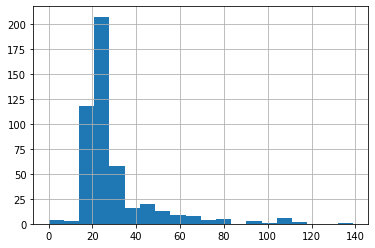

In [75]:
df["IMC"].hist(bins=20)

On va juste *travailler* sur un sous-ensemble.

In [76]:
df2=df[df['Publisher'].isin(["DC Comics","Marvel Comics"]) & df['Gender'].isin(['Male','Female'])]

In [77]:
df2.describe()

Height      Weight         IMC
count    444.000000  438.000000  436.000000
mean     222.307883  111.144292   30.054405
std      718.320987  103.465157   17.718610
min       30.500000    2.000000    0.002839
25%      175.000000   61.000000   20.569330
50%      183.000000   81.000000   24.933720
75%      188.000000  104.000000   29.856790
max    15269.400000  900.000000  138.861337

In [78]:
df2.count()

Gender        551
Eye color     551
Race          551
Hair color    551
Height        444
Publisher     551
Skin color    551
Alignment     551
Weight        438
IMC           436
dtype: int64

Une version un peu plus *advanced*:

In [79]:
df2.groupby(['Publisher','Gender']) \
   .describe(percentiles=[0.5])     \
   .drop([('Height', 'std'), ('Weight','std'), ('IMC','std')], axis=1)

Height                                    Weight  \
                      count        mean    min    50%      max  count   
Publisher     Gender                                                    
DC Comics     Female   41.0  540.790244  163.0  170.0  15269.4   40.0   
              Male    100.0  185.240000   61.0  185.0    279.0   99.0   
Marvel Comics Female   96.0  176.270833  155.0  173.0    366.0   95.0   
              Male    207.0  198.484541   30.5  188.0    975.0  204.0   

                                                       IMC             \
                            mean   min   50%    max  count       mean   
Publisher     Gender                                                    
DC Comics     Female   63.105000  50.0  59.0  135.0   40.0  20.509853   
              Male    113.828283  18.0  88.0  817.0   98.0  30.069582   
Marvel Comics Female   80.368421  48.0  57.0  495.0   95.0  23.948466   
              Male    133.593137   2.0  95.0  900.0  203.0  34.785236   

                                                        
                            min        50%         max  
Publisher     Gender                                    
DC Comics     Female   0.002839  19.834711   38.196016  
              Male    18.812147  25.680074  114.603936  
Marvel Comics Female  15.465219  20.006569  104.157899  
              Male     0.081400  27.137414  138.861337

NB: Les index sont ici des tuples car ce sont des multi-index (cf https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) 

Ou de manière similaire:

In [80]:
df2.groupby(['Publisher','Gender']).agg(['count', np.mean, np.min, np.median, np.max])

/var/folders/1c/hlhfkwhs3jg0ymfbln34zb680000gn/T/ipykernel_41793/4096259761.py:1: FutureWarning: ['Eye color', 'Race', 'Hair color', 'Skin color', 'Alignment'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df2.groupby(['Publisher','Gender']).agg(['count', np.mean, np.min, np.median, np.max])


Height                                    Weight  \
                      count        mean   amin median     amax  count   
Publisher     Gender                                                    
DC Comics     Female     41  540.790244  163.0  170.0  15269.4     40   
              Male      100  185.240000   61.0  185.0    279.0     99   
Marvel Comics Female     96  176.270833  155.0  173.0    366.0     95   
              Male      207  198.484541   30.5  188.0    975.0    204   

                                                       IMC             \
                            mean  amin median   amax count       mean   
Publisher     Gender                                                    
DC Comics     Female   63.105000  50.0   59.0  135.0    40  20.509853   
              Male    113.828283  18.0   88.0  817.0    98  30.069582   
Marvel Comics Female   80.368421  48.0   57.0  495.0    95  23.948466   
              Male    133.593137   2.0   95.0  900.0   203  34.785236   

                                                        
                           amin     median        amax  
Publisher     Gender                                    
DC Comics     Female   0.002839  19.834711   38.196016  
              Male    18.812147  25.680074  114.603936  
Marvel Comics Female  15.465219  20.006569  104.157899  
              Male     0.081400  27.137414  138.861337

NB: on peut même raffiner l'aggrégation par colonne; cf https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html#aggregation

In [81]:
df_imc=df2.pivot_table('IMC',
                    aggfunc = np.mean,
                    index = 'Publisher',
                    columns = 'Gender')

In [82]:
df_imc.describe()

Gender     Female       Male
count    2.000000   2.000000
mean    22.229159  32.427409
std      2.431467   3.334471
min     20.509853  30.069582
25%     21.369506  31.248496
50%     22.229159  32.427409
75%     23.088812  33.606323
max     23.948466  34.785236

<AxesSubplot:ylabel='Publisher'>

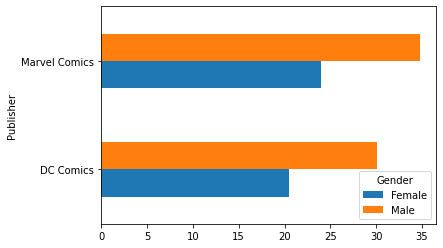

In [83]:
df_imc.plot(kind='barh')

| IMC (kg m−2)	| Interprétation |
|---------------|----------------|
|moins de 16,5	|dénutrition ou anorexie|
|16,5 à 18,5	|maigreur|
|18,5 à 25	    |poids normal|
|25 à 30	    |surpoids|
|30 à 35	    |obésité modérée|
|35 à 40	    |obésité sévère|
|plus de 40     |obésité morbide ou massive|


In [84]:
import matplotlib.pyplot as plt
plt.ion() # activation du mode interactif (utile dans ipython par exemple)

In [85]:
# not interactive
%matplotlib inline
# interactive in notebook
%matplotlib notebook

In [86]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


<IPython.core.display.Javascript object>


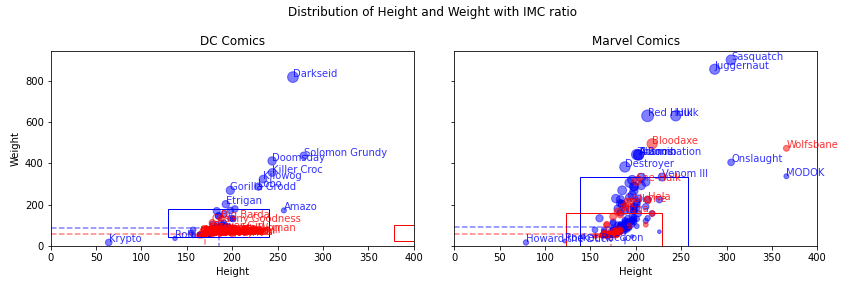

Text(0.5, 0, 'Height (cm)')

In [87]:
plt.rcParams['figure.figsize'] = [12, 4] # force width and height
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, tight_layout=True)
axs[0].set_title("DC Comics")
axs[1].set_title("Marvel Comics")
fig.suptitle("Distribution of Height and Weight with IMC ratio")
axs[0].set_ylabel('Weight (kg)')
axs[0].set_xlabel('Height (cm)')
axs[1].set_xlabel('Height (cm)')

In [88]:
dc_filter=(df2['Publisher']=="DC Comics")
marvel_filter=(df2['Publisher']=="Marvel Comics")

In [89]:
male_filter=(df2['Gender'] == "Male")
female_filter=(df2['Gender'] == "Female")

In [90]:
df_dc_male=df2[dc_filter & male_filter]
df_dc_male.plot.scatter(x='Height', y='Weight', s='IMC', ax=axs[0], alpha=0.5, color='blue')

<AxesSubplot:title={'center':'DC Comics'}, xlabel='Height', ylabel='Weight'>

In [91]:
df_dc_female=df2[dc_filter & female_filter]
df_dc_female.plot.scatter(x='Height', y='Weight', s='IMC', ax=axs[0], alpha=0.5, color='red')

<AxesSubplot:title={'center':'DC Comics'}, xlabel='Height', ylabel='Weight'>

In [92]:
df_marvel_male=df2[marvel_filter & male_filter]
df_marvel_male.plot.scatter(x='Height', y='Weight', s='IMC', ax=axs[1], alpha=0.5, color='blue')

<AxesSubplot:title={'center':'Marvel Comics'}, xlabel='Height', ylabel='Weight'>

In [93]:
df_marvel_female=df2[marvel_filter & female_filter]
df_marvel_female.plot.scatter(x='Height', y='Weight', s='IMC', ax=axs[1], alpha=0.5, color='red')

<AxesSubplot:title={'center':'Marvel Comics'}, xlabel='Height', ylabel='Weight'>

In [94]:
def draw_ref_point(df,c,ax):
    x=df.Height.median()
    y=df.Weight.median()
    s=df.IMC.median()
    ax.scatter(x=[x],y=[y],s=[s],color=c, marker='*')
    ax.plot([0,x,x],[y,y,0],c=c,ls='--', lw=1.5, alpha=0.5)

In [95]:
draw_ref_point(df_dc_male,'blue',axs[0])
draw_ref_point(df_dc_female,'red',axs[0])
draw_ref_point(df_marvel_male,'blue',axs[1])
draw_ref_point(df_marvel_female,'red',axs[1])

In [96]:
axs[0].set_xlim(xmin=0, xmax=400) # on néglige les points extrêmes à droite
axs[0].set_ylim(ymin=0)

(0.0, 945.0)

Mais qui sont ces valeurs énormes d'IMC ?

In [97]:
df_dc_female.iloc[df_dc_female.IMC.argmax()] # argmax retourne l'index entier => .iloc

Gender           Female
Eye color          blue
Race            New God
Hair color        Black
Height            188.0
Publisher     DC Comics
Skin color            -
Alignment           bad
Weight            135.0
IMC           38.196016
Name: Big Barda, dtype: object

In [98]:
df_marvel_male.sort_values(by='IMC', ascending=False).head(5)

Gender Eye color               Race Hair color  Height  \
Name                                                                 
Red Hulk      Male    yellow  Human / Radiation      Black   213.0   
Thanos        Male       red            Eternal    No Hair   201.0   
Destroyer     Male         -                  -          -   188.0   
A-Bomb        Male    yellow              Human    No Hair   203.0   
Abomination   Male     green  Human / Radiation    No Hair   203.0   

                 Publisher Skin color Alignment  Weight         IMC  
Name                                                                 
Red Hulk     Marvel Comics        red   neutral   630.0  138.861337  
Thanos       Marvel Comics     purple       bad   443.0  109.650751  
Destroyer    Marvel Comics          -       bad   383.0  108.363513  
A-Bomb       Marvel Comics          -      good   441.0  107.015458  
Abomination  Marvel Comics          -       bad   441.0  107.015458

On va ajouter quelques labels pour les valeurs marginales:

In [99]:
def add_name(df, ax, hfactor, wfactor, color):
    import matplotlib.patches as patches
    mid_height = df.Height.mean()
    mid_weight = df.Weight.mean()
    min_height = mid_height * (1-hfactor)
    max_height = mid_height * (1+hfactor)
    min_weight = mid_weight * (1-wfactor)
    max_weight = mid_weight * (1+wfactor)
    for i in range(df.index.size):
        height = df.iloc[i].Height
        weight = df.iloc[i].Weight
        if height < 400 \
           and not (min_height < height < max_height and min_weight < weight < max_weight):
                ax.text(height, weight, df.index[i], alpha=0.8, color=color)
    rect = patches.Rectangle((min_height, min_weight), max_height-min_height, max_weight-min_weight, 
                             linewidth=1, facecolor=None, edgecolor=color, fill=False)
    ax.add_patch(rect)
add_name(df_dc_male, axs[0], 0.3, 0.6, "blue")
add_name(df_dc_female, axs[0], 0.3, 0.6, "red")
add_name(df_marvel_male, axs[1], 0.3, 1.5, "blue")
add_name(df_marvel_female, axs[1], 0.3, 1.0, "red")

# Aller plus loin
L'API de pandas est énorme (peut-être même plus que celle de NumPy). Il faut pratiquer et explorer les sections dont vous aurez besoin (ce qui dépend beaucoup des contextes d'utilisation)